In [1]:
from __future__ import print_function

In [2]:
# https://mortada.net/fibonacci-numbers-in-python.html

## Fibonacci numbers
The Fibonacci numbers are defined recursively by the following difference equation:

⎧⎩⎨FnF1F0=Fn−1+Fn−2=1=0(1)
It is easy to compute the first few elements in the sequence:

0,1,1,2,3,5,8,13,21,34⋯

Derivation of the general formula
It is possible to derive a general formula for Fn without computing all the previous numbers in the sequence. If a gemetric series (i.e. a series with a constant ratio between consecutive terms rn) is to solve the difference equation, we must have

rn=rn−1+rn−2
which is equivalent to

r2=r+1
This equation has two unique solutions
φ=1+5–√2≈1.61803⋯ ψ=1−5–√2=1−φ=−1φ≈−0.61803⋯ 
In particular the larger root is known as the golden ratio
φ=1+5–√2≈1.61803⋯(2)
Now, since both roots solve the difference equation for Fibonacci numbers, any linear combination of the two sequences also solves it

a(1+5–√2)n+b(1−5–√2)n
It's not hard to see that all Fibonacci numbers must be of this general form because we can uniquely solve for a and b such that the initial conditions of F1=1 and F0=0 are met

⎧⎩⎨⎪⎪⎪⎪⎪⎪⎪⎪F0=0=a(1+5–√2)0+b(1−5–√2)0F1=1=a(1+5–√2)1+b(1−5–√2)1(3)
yielding

⎧⎩⎨⎪⎪⎪⎪⎪⎪a=15–√b=−15–√(4)
We have therefore derived the general formula for the n-th Fibonacci number

Fn=15–√(1+5–√2)n−15–√(1−5–√2)n
Since the second term has an absolute value smaller than 1, we can see that the ratios of Fibonacci numbers converge to the golden ratio

limn→∞FnFn−1=1+5–√2
Various implementations in Python
Writing a function in Python that outputs the n-th Fibonacci number seems simple enough. However even in this simple case one should be aware of some of the computational subtleties in order to avoid common pitfalls and improve efficiency.

Common pitfall #1: inefficient recursion
Here's a very straight-forward recursive implementation

In [3]:
import math

def fib_recursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_recursive(n-1) + fib_recursive(n-2)

In [4]:
print([fib_recursive(i) for i in range(20)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [5]:
%timeit fib_recursive(34)

3.97 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
def fibonacci(n):
    "Return the Fibonacci sequence of length *sequence_length*"
    sequence = [0,1]
    if n < 1:
        print("Fibonacci sequence only defined for length 1 or greater")
        return
    
    if 0 < n < 3:
        return sequence[:n]
    
    for i in range(2,n): 
        sequence.append(sequence[i-1]+sequence[i-2])
    
    return sequence

In [7]:
%timeit fibonacci(34)

9.58 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The overhead incurred by creating a large number of stack frames is tremendous. Python by default does not perform what's known as tail recursion elimination http://stackoverflow.com/questions/13543019/why-is-recursion-in-python-so-slow, and therefore this is a very inefficient implemenation. In contrast, if we have an iterative implementation, the speed is dramatically faster

In [8]:
def fib_iterative(n):
    a, b = 0, 1
    while n > 0:
        a, b = b, a + b
        n -= 1
    return a

%timeit fib_iterative(34)

4.95 µs ± 319 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now, let's see if we can make it even faster by eliminating the loop altogether and just go straight to the general formula we derived earlier

In [9]:
def fib_formula(n):
    golden_ratio = (1 + math.sqrt(5)) / 2
    val = (golden_ratio**n - (1 - golden_ratio)**n) / math.sqrt(5)
    return int(round(val))

%timeit fib_formula(34)

1.97 µs ± 70.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Even faster, great! And since we are not looping anymore, we should expect to see the computation time to scale better as n increases. That's indeed what we see:

In [10]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [11]:
figsize(15, 5)
elapsed = {}
elapsed['iterative'] = {}
elapsed['formula'] = {}

for i in range(34):
    result = %timeit -n 10000 -q -o fib_iterative(i)
    elapsed['iterative'][i] = result.best
    result = %timeit -n 10000 -q -o fib_formula(i)
    elapsed['formula'][i] = result.best

Text(0.5, 0, 'n')

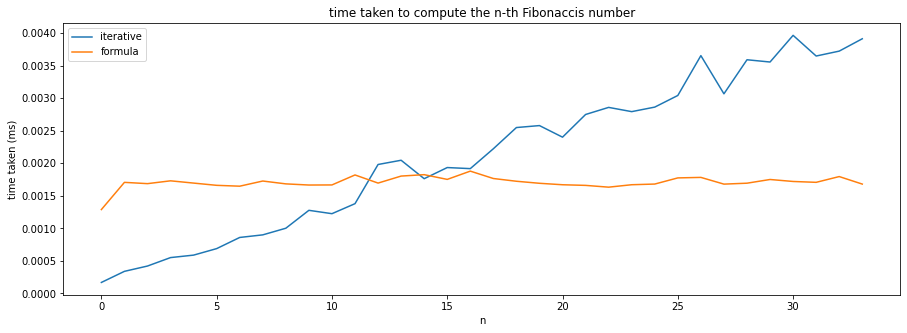

In [12]:
elapased_ms = pd.DataFrame(elapsed) * 1000
elapased_ms.plot(title='time taken to compute the n-th Fibonaccis number')
plt.ylabel('time taken (ms)')
plt.xlabel('n')

Indeed as we expect, the iterative approach scales linearly, while the formula approach is basically constant time.

However we need to be careful with using a numerical formula like this for getting integer results.

Common pitfall #2: numerical precision
Here we compare the actual values obtained by fib_iterative() and fib_formula(). Notice that it does not take a very large n for us to run into numerical precision issues.

When n is 71 we are starting to get different results from the two implementations!

In [ ]:
df = {}
df['iterative'] = {}
df['formula'] = {}
df['diff'] = {}

for i in range(100):
    df['iterative'][i] = fib_iterative(i)
    df['formula'][i] = fib_formula(i)
    df['diff'][i] = df['formula'][i] - df['iterative'][i]
df = pd.DataFrame(df, columns=['iterative', 'formula', 'diff'])
df.index.name = 'n-th Fibonacci'

In [13]:
df.ix[68:74]

AttributeError: 'DataFrame' object has no attribute 'ix'